In [7]:
### Import required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, img_as_ubyte, feature

GLCM

Smooth Texture:
  Contrast: 14.22187590257052
  Correlation: 0.9447970977864389
  Energy: 0.04939636144379509
  Homogeneity: 0.32713415902093684


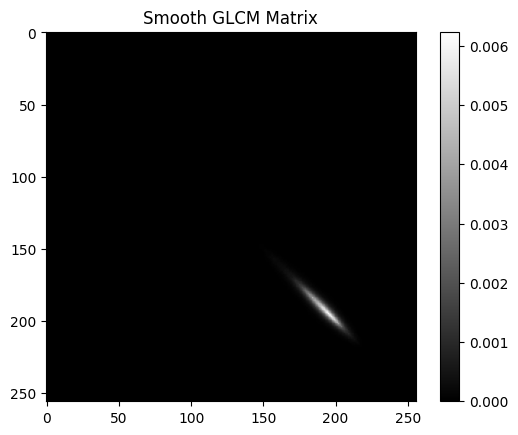

Coarse Texture:
  Contrast: 1781.0068521046558
  Correlation: 0.6702677544132705
  Energy: 0.2507530224590388
  Homogeneity: 0.3120937647766087


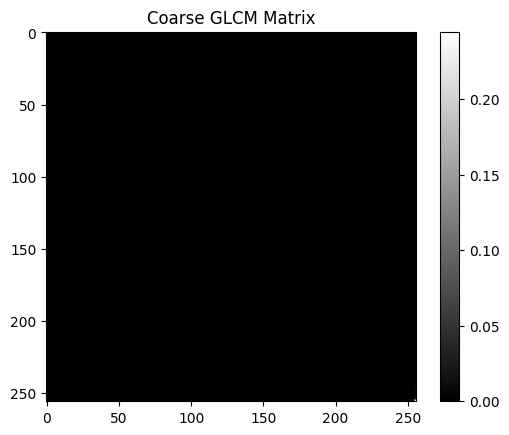

Random Texture:
  Contrast: 2149.4277638715057
  Correlation: 0.9015275954033978
  Energy: 0.2677401641800293
  Homogeneity: 0.37941473682014426


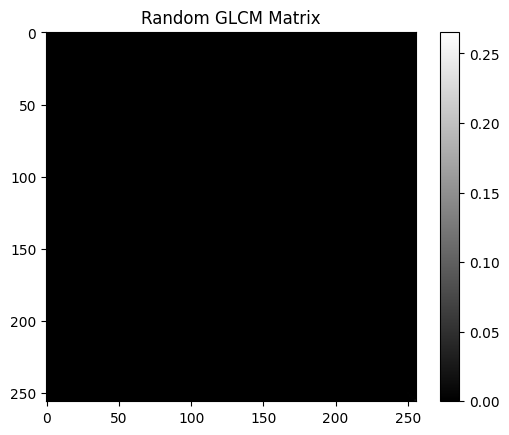

In [22]:
# Base path to the folder containing images
base_path = r'C:\Users\danis\OneDrive\Documents\Repos\CV_PE2\Practicals\P2_GLCM\data'

# Load images in grayscale
smooth_image = cv2.imread(rf"{base_path}\smooth.jpg", cv2.IMREAD_GRAYSCALE)
coarse_image = cv2.imread(rf"{base_path}\coarse.jpg", cv2.IMREAD_GRAYSCALE)  # Fixed name
random_image = cv2.imread(rf"{base_path}\random.png", cv2.IMREAD_GRAYSCALE)
cameraman_image = cv2.imread(rf"{base_path}\cameraman.png", cv2.IMREAD_GRAYSCALE)

# Ensure images are valid and converted properly
def validate_image(image):
    if image is None:
        raise ValueError("Image could not be loaded. Check the file path.")
    return image

smooth_image = validate_image(smooth_image)
coarse_image = validate_image(coarse_image)
random_image = validate_image(random_image)
cameraman_image = validate_image(cameraman_image)

# Function to compute GLCM properties
def compute_glcm(image):
    # Ensure the image is 2D (already grayscale)
    if len(image.shape) != 2:
        raise ValueError("Input image must be a 2D grayscale image.")
    
    # Compute GLCM
    glcm = feature.graycomatrix(image, distances=[1], angles=[0], symmetric=True, normed=True)
    contrast = feature.graycoprops(glcm, 'contrast')[0, 0]
    correlation = feature.graycoprops(glcm, 'correlation')[0, 0]
    energy = feature.graycoprops(glcm, 'energy')[0, 0]
    homogeneity = feature.graycoprops(glcm, 'homogeneity')[0, 0]
    return glcm, contrast, correlation, energy, homogeneity

# Analyze textures
for name, image in [("Smooth", smooth_image), ("Coarse", coarse_image), ("Random", random_image)]:
    glcm, contrast, correlation, energy, homogeneity = compute_glcm(image)
    print(f"{name} Texture:")
    print(f"  Contrast: {contrast}")
    print(f"  Correlation: {correlation}")
    print(f"  Energy: {energy}")
    print(f"  Homogeneity: {homogeneity}")
    plt.imshow(glcm[:, :, 0, 0], cmap='gray')
    plt.title(f"{name} GLCM Matrix")
    plt.colorbar()
    plt.show()


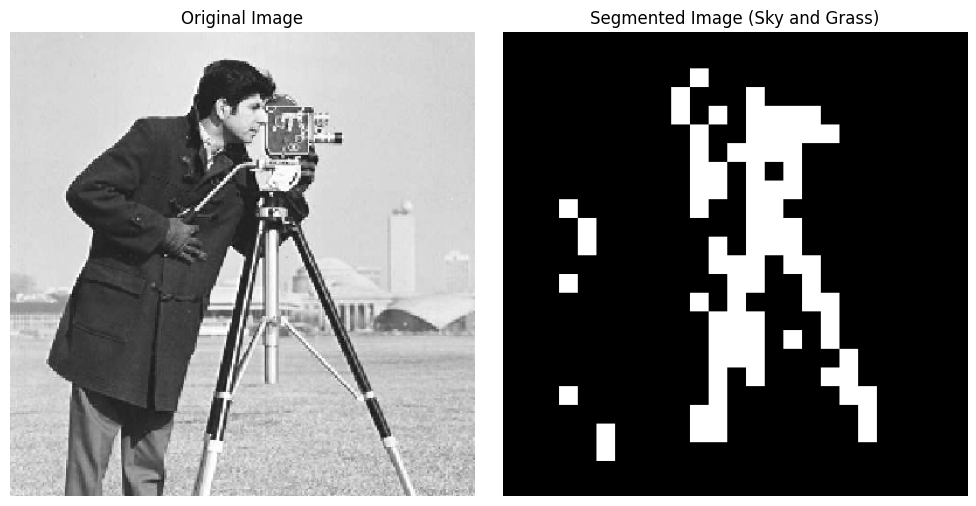

In [23]:
import cv2
import numpy as np
from skimage.feature import graycomatrix, graycoprops
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the 'cameraman' image
base_path = r'C:\Users\danis\OneDrive\Documents\Repos\CV_PE2\Practicals\P2_GLCM\data'
cameraman_path = rf"{base_path}\cameraman.png"
cameraman_image = cv2.imread(cameraman_path, cv2.IMREAD_GRAYSCALE)

if cameraman_image is None:
    raise ValueError("Cameraman image could not be loaded. Check the file path.")

# Parameters
patch_size = 16  # Size of patches for texture analysis
distances = [1]  # Distance for GLCM computation
angles = [0]  # Angle for GLCM computation

# Get image dimensions
height, width = cameraman_image.shape

# Initialize arrays to store features and positions
features = []
positions = []

# Divide the image into patches and compute GLCM features for each patch
for y in range(0, height, patch_size):
    for x in range(0, width, patch_size):
        patch = cameraman_image[y:y+patch_size, x:x+patch_size]
        if patch.shape[0] != patch_size or patch.shape[1] != patch_size:
            continue  # Skip incomplete patches at edges

        # Compute GLCM
        glcm = graycomatrix(patch, distances=distances, angles=angles, symmetric=True, normed=True)

        # Extract texture features
        contrast = graycoprops(glcm, 'contrast')[0, 0]
        energy = graycoprops(glcm, 'energy')[0, 0]
        homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]

        # Append features and patch positions
        features.append([contrast, energy, homogeneity])
        positions.append((y, x))

# Convert features to a NumPy array for clustering
features = np.array(features)

# Perform K-means clustering (2 clusters for sky and grass)
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(features)

# Reconstruct the segmented image
segmented_image = np.zeros((height, width), dtype=np.uint8)

for label, (y, x) in zip(labels, positions):
    segmented_image[y:y+patch_size, x:x+patch_size] = int(255 * label / (n_clusters - 1))

# Display the original and segmented images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(cameraman_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Segmented Image (Sky and Grass)")
plt.imshow(segmented_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()
